In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DigitalModulations import *

# Questão 1

In [2]:
# Parameters
M_symbols = [4, 16, 64] # Number of symbols in the constellation M-QAM
L_bits = 264000 # Number of bits to transmit
c_distance = 1 

for M in M_symbols:
    # Generate random bits 
    bits = np.array([list(map(int, f"{i:0{int(np.log2(M))}b}")) for i in range(M)]).flatten()


    # Making a modulation
    qam_symbols, gray_labels = getQAM(bits, M, c_distance)
    
    energy = getEnergy(qam_symbols)
    print(f'A energia média para a modulação {M}-QAM é {energy:.5f}')

    min_distance = getMinDistance(qam_symbols)
    print(f'A distância média entre os símbolos para a modulação {M}-QAM é {min_distance:.5f}')


A energia média para a modulação 4-QAM é 2.00000
A distância média entre os símbolos para a modulação 4-QAM é 2.00000
A energia média para a modulação 16-QAM é 10.00000
A distância média entre os símbolos para a modulação 16-QAM é 2.00000
A energia média para a modulação 64-QAM é 42.00000
A distância média entre os símbolos para a modulação 64-QAM é 2.00000


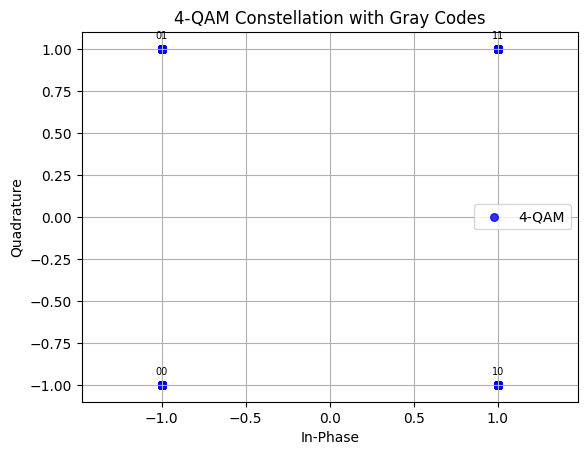

In [3]:
# Plotting the constellation diagram for 4-QAM
# Parâmetros
M = 4 

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, L_bits)


# Modulação
qam_symbols, gray_labels = getQAM(bits, M, c_distance)

# Plotando a constelação
plt.scatter(qam_symbols.real, qam_symbols.imag, s=30, color='blue', label=f'{M}-QAM', alpha=0.8)

# Adicionando os códigos Gray aos pontos
for symbol, gray_label in gray_labels.items():
    plt.text(symbol.real, symbol.imag + 0.05, gray_label, fontsize=7, ha='center', va='bottom')

plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.title(f'{M}-QAM Constellation with Gray Codes')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()


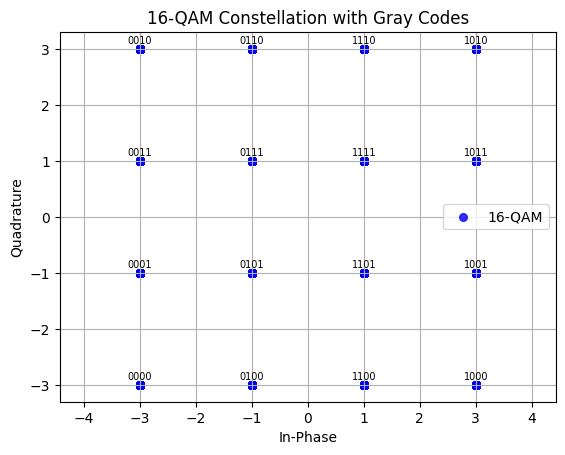

In [4]:
# Plotting the constellation diagram for 16-QAM
# Parâmetros
M = 16 

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, L_bits)

# Modulação
qam_symbols, gray_labels = getQAM(bits, M, c_distance)

# Plotando a constelação
plt.scatter(qam_symbols.real, qam_symbols.imag, s=30, color='blue', label=f'{M}-QAM', alpha=0.8)

# Adicionando os códigos Gray aos pontos
for symbol, gray_label in gray_labels.items():
    plt.text(symbol.real, symbol.imag + 0.05, gray_label, fontsize=7, ha='center', va='bottom')

plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.title(f'{M}-QAM Constellation with Gray Codes')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()


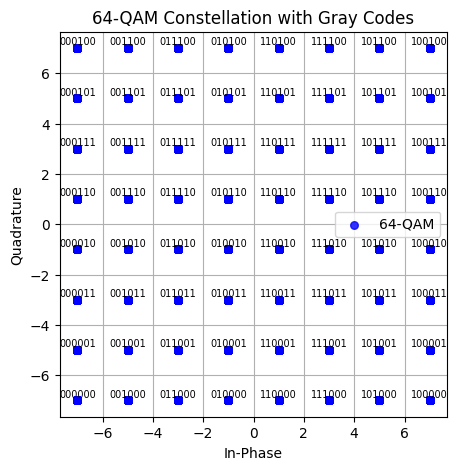

In [5]:
# Plotting the constellation diagram for 64-QAM
# Parâmetros
M = 64 

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, L_bits)
# Modulação
qam_symbols, gray_labels = getQAM(bits, M, c_distance)

plt.figure(figsize=(5, 5))  
plt.scatter(qam_symbols.real, qam_symbols.imag, s=30, color='blue', label=f'{M}-QAM', alpha=0.8)

# Adicionando os códigos Gray 
for symbol, gray_label in gray_labels.items():
    plt.text(symbol.real, symbol.imag + 0.05, gray_label, fontsize=7, ha='center', va='bottom')

plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.title(f'{M}-QAM Constellation with Gray Codes')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()


# Questão 2

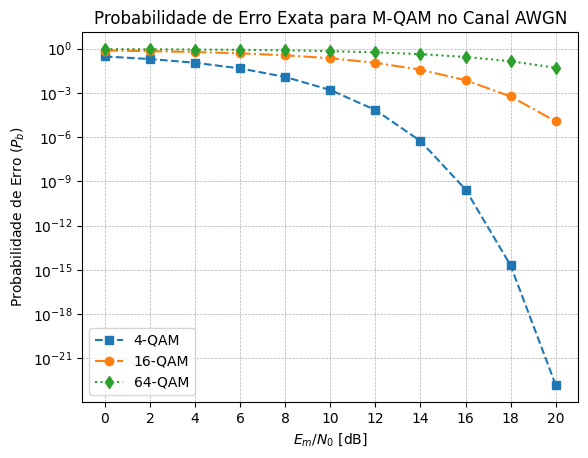

In [6]:
snr_range = np.arange(0, 22, 2) # SNR range in dB
error_prob_theory = [] 

for M in M_symbols:
    Pb = TheoricalErrorProbMQAM(M, snr_range)
    error_prob_theory.append(Pb)

plt.figure()
plt.semilogy(snr_range, error_prob_theory[0], '--s', label=f'{M_symbols[0]}-QAM')
plt.semilogy(snr_range, error_prob_theory[1], '-.o', label=f'{M_symbols[1]}-QAM')
plt.semilogy(snr_range, error_prob_theory[2], ':d', label=f'{M_symbols[2]}-QAM')


# Configurações do gráfico
plt.xlabel('$E_m / N_0$ [dB]')
plt.ylabel('Probabilidade de Erro ($P_b$)')
plt.title('Probabilidade de Erro Exata para M-QAM no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()  

# Questão 3

In [10]:
SER_simulated = []
BER_simulated = []

for M in M_symbols:
    SER, BER = getSERandBER(bits, M, snr_range)
    SER_simulated.append(SER)
    BER_simulated.append(BER)


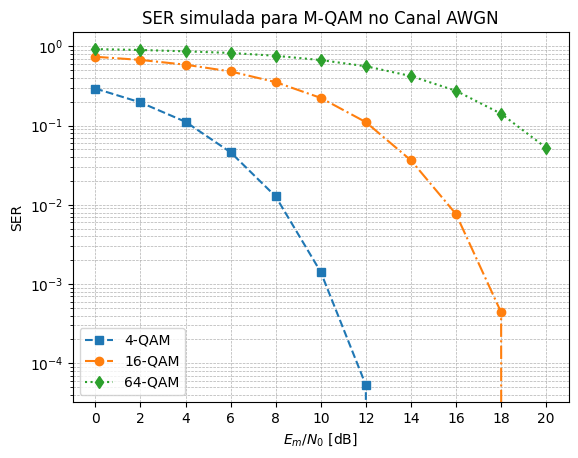

In [11]:
plt.figure()
plt.semilogy(snr_range, SER_simulated[0], '--s', label=f'{M_symbols[0]}-QAM')
plt.semilogy(snr_range, SER_simulated[1], '-.o', label=f'{M_symbols[1]}-QAM')
plt.semilogy(snr_range, SER_simulated[2], ':d', label=f'{M_symbols[2]}-QAM')


plt.xlabel('$E_m / N_0$ [dB]')
plt.ylabel('SER')
plt.title('SER simulada para M-QAM no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()

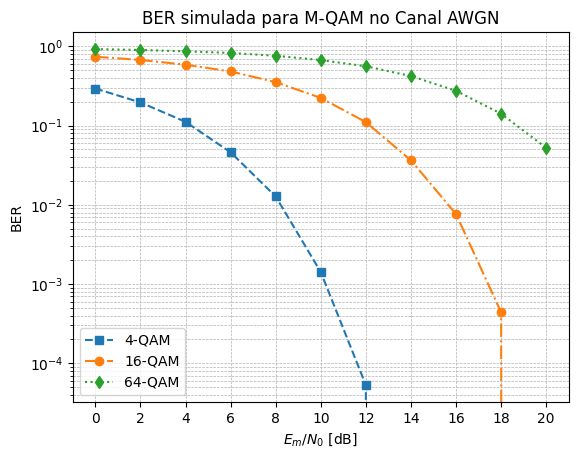

In [12]:
plt.figure()
plt.semilogy(snr_range, BER_simulated[0], '--s', label=f'{M_symbols[0]}-QAM')
plt.semilogy(snr_range, BER_simulated[1], '-.o', label=f'{M_symbols[1]}-QAM')
plt.semilogy(snr_range, BER_simulated[2], ':d', label=f'{M_symbols[2]}-QAM')


plt.xlabel('$E_m / N_0$ [dB]')
plt.ylabel('BER')
plt.title('BER simulada para M-QAM no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()